In [1]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Uniform 

(0.0, 50.0)

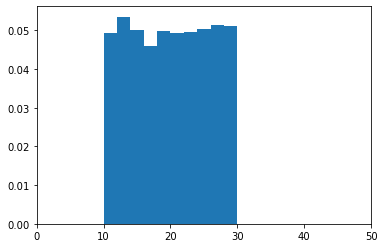

In [2]:
a = 10
b = 30
N = 10000
x = np.random.uniform(a,b,size=N)
r = plt.hist(x, density=True)
plt.xlim(0,50)

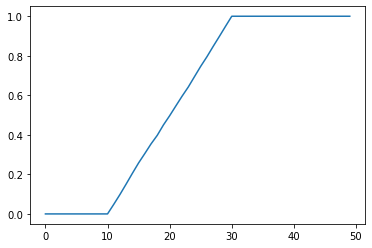

In [3]:
cdf = np.zeros(50)
for i in range(50):
    cdf[i] = (x<=i).sum()
cdf /= N
r = plt.plot(cdf)

# Exponential - Poisson

(0.0, 5.0)

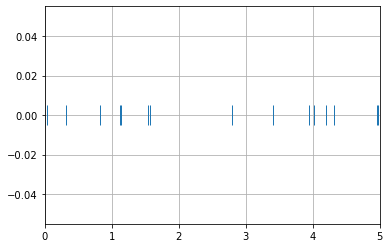

In [4]:
T = 10000 # seconds
rate = 3 # arrivals per second
arrivals = np.random.uniform(0,T,size=T*rate)
arrivals.sort()
first_k = arrivals[arrivals<5]
plt.plot(first_k,np.zeros_like(first_k),'|', markersize=20)
plt.grid()
plt.xlim(0,5)

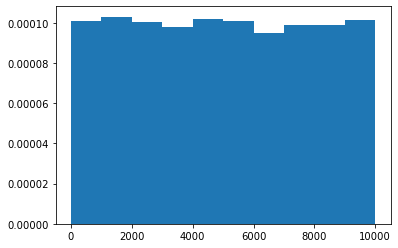

In [5]:
r = plt.hist(arrivals, density=True)

[0.03136077 0.30850941 0.81624976 1.12246341 1.14293649]
[0.27714864 0.50774035 0.30621365 0.02047308]


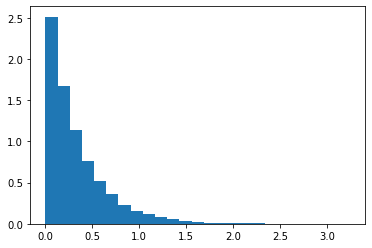

In [6]:
interarrivals = np.diff(arrivals)
print(arrivals[:5])
print(interarrivals[:4])
r = plt.hist(interarrivals, density=True, bins=25)

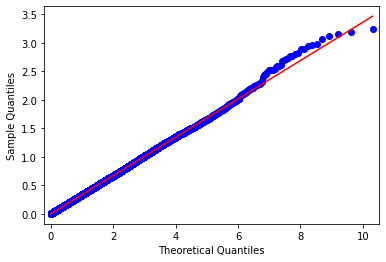

In [7]:
#r = sm.qqplot(interarrivals,dist=stats.uniform,line='r')
#r = sm.qqplot(interarrivals,dist=stats.norm,line='r')
r = sm.qqplot(interarrivals,dist=stats.expon,line='r')


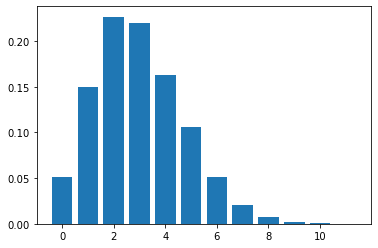

In [8]:
arrivals_per_second = []
for t in range(T):
    arrivals_per_second.append(np.logical_and(arrivals>=t, arrivals<(t+1)).sum())
pmf, bins = np.histogram(arrivals_per_second, bins=range(0,max(arrivals_per_second)), density=True)
r = plt.bar(bins[:-1],pmf)

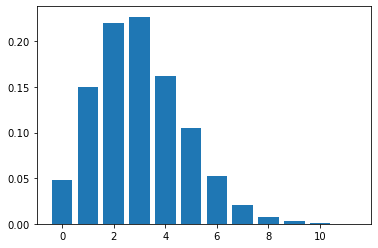

In [9]:
#p = np.random.binomial(2*rate,0.5,size=T)
p = np.random.poisson(rate,size=T)
pmf, bins = np.histogram(p, bins=range(0,max(arrivals_per_second)), density=True)
r = plt.bar(bins[:-1],pmf)

# population mean - sample mean

Population mean=50.00803576855174 std=28.857006067704127


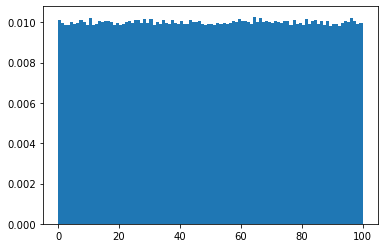

In [10]:
N=1000000 # population size
population = np.random.uniform(0,100,size=N)
#population = np.random.exponential(50,size=N)
#population = np.random.normal(50,10,size=N)
mu = population.mean()
sigma = population.std()
print(f'Population mean={mu} std={sigma}')
r = plt.hist(population,density=True,bins=100)

Sample mean=50.23908864883099 std=27.46608076269693


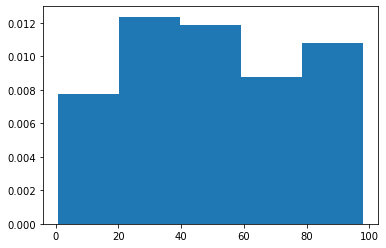

In [11]:
n=100 # sample size
sample = np.random.choice(population, size=n)
m = sample.mean()
s = sample.std(ddof=1)
print(f'Sample mean={m} std={s}')
r = plt.hist(sample,density=True,bins=5)

In [12]:
K = 1000 # try K times
ms = []
for i in range(K):
    sample = np.random.choice(population, size=n)
    ms.append(sample.mean()) 
ms = np.array(ms)
print(f'mean of means = {ms.mean()}')
print(f'stdev of means = {ms.std()}')
print(f'sigma/sqrt(n) = {sigma/math.sqrt(n)}')

mean of means = 50.00118228534443
stdev of means = 2.8887076359663006
sigma/sqrt(n) = 2.8857006067704125


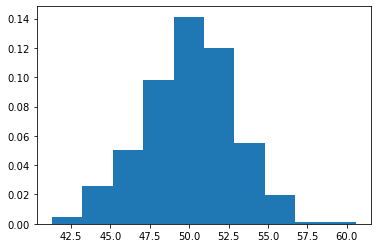

In [13]:
r = plt.hist(ms,density=True)

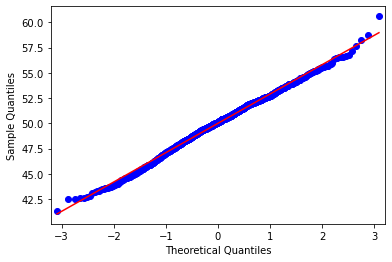

In [14]:
r = sm.qqplot(ms, line='r')

## mean - confidence interval

z=±1.959963984540054


(0.0, 0.5)

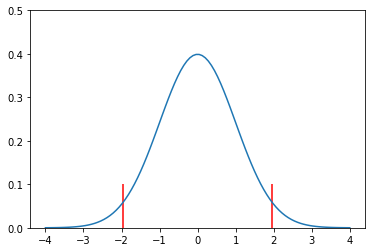

In [15]:
alpha = 0.05
z_alpha_over_2 = stats.norm().ppf(1-alpha/2)  # or stats.norm.ppf(alpha/2)
print(f'z=±{z_alpha_over_2}')
xs = np.linspace(-4,4,100)
plt.plot(xs,[stats.norm().pdf(x) for x in xs])
plt.vlines([z_alpha_over_2,-z_alpha_over_2],0,0.1,color='red')
plt.ylim(0,0.5)

In [16]:
sigma_n = sigma/math.sqrt(n)
z = (ms-mu)/sigma_n
out = np.logical_or(z<-z_alpha_over_2, z>z_alpha_over_2)
print(f'out of confidence interval = {out.mean()}')

out of confidence interval = 0.049


# population proportion - sample proportion

Population p=0.800435 std=0.3996733801180659  --- sqrt(p*q)=0.3996733801180659


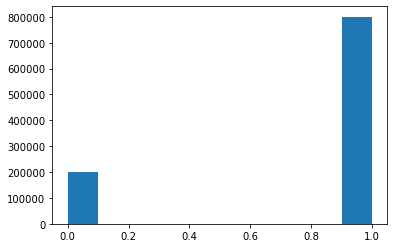

In [17]:
N=1000000 # population size
population = np.random.binomial(1,0.8,size=N)
p = population.mean()
q = 1-p
sigma = population.std()
print(f'Population p={p} std={sigma}  --- sqrt(p*q)={math.sqrt(p*q)}')
r = plt.hist(population)

Sample mean=0.76 std=0.42923469599092784


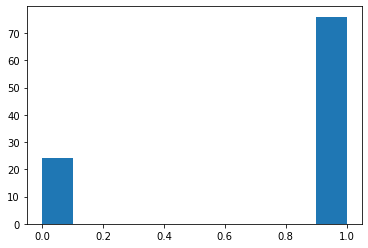

In [18]:
n=100 # sample size
sample = np.random.choice(population, size=n)
m = sample.mean()
s = sample.std(ddof=1)
print(f'Sample mean={m} std={s}')
r = plt.hist(sample)

In [19]:
K = 1000 # try K times
ps = []
for i in range(K):
    sample = np.random.choice(population, size=n)
    ps.append(sample.mean()) 
ps = np.array(ps)
print(f'mean of ps = {ps.mean()}')
print(f'stdev of ps = {ps.std()}')
print(f'sqrt(p*q)/sqrt(n) = {math.sqrt(p*q/n)}')

mean of ps = 0.8011500000000001
stdev of ps = 0.03963303546285597
sqrt(p*q)/sqrt(n) = 0.03996733801180659


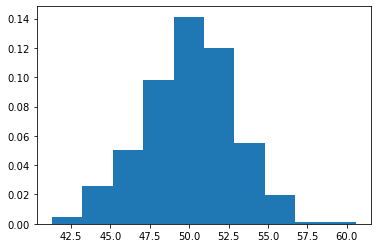

In [20]:
r = plt.hist(ms, density=True)

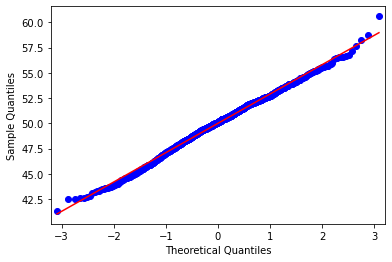

In [21]:
r = sm.qqplot(ms, line='r')

In [22]:
alpha = 0.01
z_alpha_over_2 = stats.norm().ppf(1-alpha/2)  # or stats.norm.ppf(alpha/2)
sigma_n = sigma/math.sqrt(n)
z = (ps-p)/sigma_n
out = np.logical_or(z<-z_alpha_over_2, z>z_alpha_over_2)
print(f'out of confidence interval = {out.mean()}')

out of confidence interval = 0.007
